<a href="https://colab.research.google.com/github/Saeswar/AI-ML-AVANTHI-SAESWAR/blob/main/Stock_price_prediction_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [91]:
df = pd.read_csv("/content/TSLA.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


Print the first 10 and last 10 elements of the dataset

In [92]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [93]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2406,2020-01-21,530.250000,548.580017,528.409973,547.200012,547.200012,17803500
2407,2020-01-22,571.890015,594.500000,559.099976,569.559998,569.559998,31369000
2408,2020-01-23,564.250000,582.000000,555.599976,572.200012,572.200012,19651000
2409,2020-01-24,570.630005,573.859985,554.260010,564.820007,564.820007,14353600
2410,2020-01-27,541.989990,564.440002,539.280029,558.020020,558.020020,13608100
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


Plot the closing price.per year

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


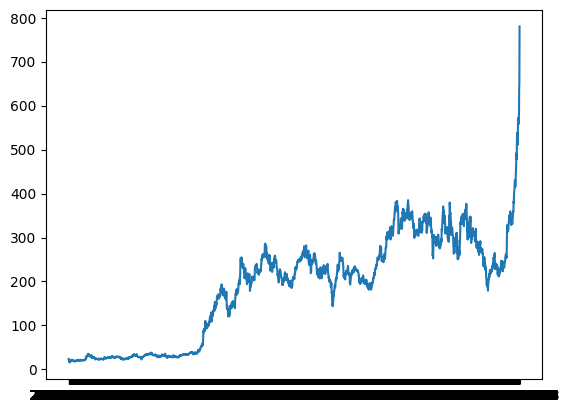

In [95]:
X = df['Date']
Y = df['Close']
plt.plot(X,Y)
plt.show()

Create 2 new columns in the data frame.

Column 1 = Open - close
Column 2 = High - Low


In [96]:
df['Column1']=df['Open']-df['Close']
df['Column2']=df['High']-df['Low']
df


,Date,Open,High,Low,Close,Adj Close,Volume,Column1,Column2
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000
...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1.589966,18.729981
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-5.299988,22.369995
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-8.390015,32.880005
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,-10.570007,20.479980


Drop all the na values

In [97]:
df.dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,Column1,Column2
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000
...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1.589966,18.729981
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-5.299988,22.369995
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-8.390015,32.880005
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,-10.570007,20.479980


Finding the correlation matrix

<ipython-input-98-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

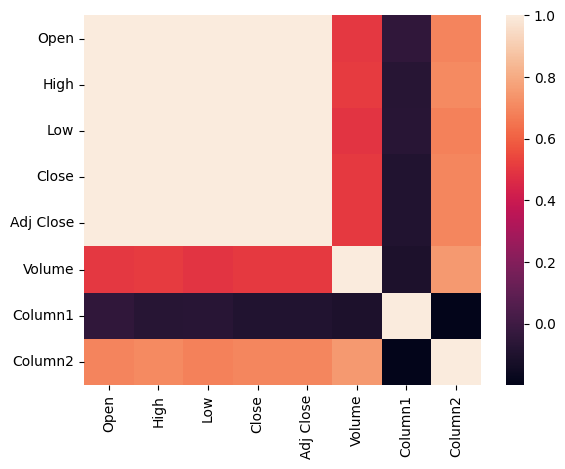

In [98]:
sns.heatmap(df.corr())

In [99]:
df=df.drop(["Date"],axis='columns')

In [100]:
df

,Open,High,Low,Close,Adj Close,Volume,Column1,Column2
0,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999
1,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001
2,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000
3,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001
4,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000
...,...,...,...,...,...,...,...,...
2411,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1.589966,18.729981
2412,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-5.299988,22.369995
2413,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-8.390015,32.880005
2414,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,-10.570007,20.479980


In [101]:
X = df.drop(["Close"],axis='columns').values
Y = df["Close"]

In [102]:
X

array([[ 1.90000000e+01,  2.50000000e+01,  1.75400010e+01, ...,
         1.87663000e+07, -4.88999900e+00,  7.45999900e+00],
       [ 2.57900010e+01,  3.04200000e+01,  2.32999990e+01, ...,
         1.71871000e+07,  1.96000100e+00,  7.12000100e+00],
       [ 2.50000000e+01,  2.59200000e+01,  2.02700000e+01, ...,
         8.21880000e+06,  3.04000100e+00,  5.65000000e+00],
       ...,
       [ 6.32419983e+02,  6.50880005e+02,  6.18000000e+02, ...,
         2.90057000e+07, -8.39001500e+00,  3.28800050e+01],
       [ 6.40000000e+02,  6.53000000e+02,  6.32520020e+02, ...,
         1.57193000e+07, -1.05700070e+01,  2.04799800e+01],
       [ 6.73690002e+02,  7.86140015e+02,  6.73520020e+02, ...,
         4.70650000e+07, -1.06309998e+02,  1.12619995e+02]])

In [103]:
Y

0        23.889999
1        23.830000
2        21.959999
3        19.200001
4        16.110001
           ...    
2411    566.900024
2412    580.989990
2413    640.809998
2414    650.570007
2415    780.000000
Name: Close, Length: 2416, dtype: float64

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
             X, Y, test_size = 0.3, random_state = 0)


In [108]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,Y_train)



ValueError: Unknown label type: 'continuous'

In [87]:
Y_pred = regressor.predict(X_test)
Y_pred



array([357.320007,  19.200001, 264.200012, 214.360001, 230.460007,
       319.570007,  21.959999, 279.070007, 259.320007, 317.549988,
        25.83    , 190.570007, 317.01001 , 233.419998,  33.639999,
       300.079987, 310.100006,  39.240002, 237.190002,  32.25    ,
       164.5     , 226.720001, 205.179993,  19.940001,  43.299999,
       359.519989, 337.950012,  33.93    , 100.300003, 248.710007,
       334.070007, 305.519989,  24.950001,  18.139999,  26.959999,
       223.610001, 308.73999 , 182.779999, 147.979996,  25.58    ,
       214.309998,  29.4     ,  36.849998, 257.01001 , 225.009995,
       188.589996, 273.200012, 339.850006,  29.950001,  28.940001,
        22.969999, 213.029999,  20.23    , 346.170013,  27.709999,
       335.48999 , 229.009995, 183.929993,  33.59    ,  27.25    ,
        95.370003,  24.08    , 230.75    ,  37.849998, 262.799988,
        27.85    , 253.880005, 145.720001, 278.480011, 247.729996,
       349.540009, 127.279999, 319.570007, 312.209991, 321.899

In [88]:
print(regressor.coef_)


[ 3.33333333e-01  6.41020209e-13 -6.46092302e-13  6.66666667e-01
 -1.35525272e-20 -3.33333333e-01 -6.40525235e-13]


In [89]:

regressor.score(X_test,Y_test)


1.0